# BBM469 : Data Intensive Applications Lab. Assignment 2

### Pre-Note
##### Graphs and Tables will be updated on new run.

### PROBLEM DEFINITION :
In this assignment, we were asked to understand the classification and clustering algorithms using python libraries and perform a basic experiment with appropriate datasets. We have also dealt with data manipulation and data normalization.

In [373]:
# Installing necessary modules from the text file
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement pandas~=1.3.4 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5)
ERROR: No matching distribution found for pandas~=1.3.4


## Packages and First Look to the Dataset

In [374]:
# Importing packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [375]:
def display_confusion_matrix(confusion_matrix, message):
    # Heatmap display for confusion matrix
    labels = ["TN", "FP", "FN", "TP"]
    length = len(max(labels)) + 12
    labels = np.asarray(labels).reshape(2, 2)

    annots = [f"{str(label)}({str(value)})" for array in np.dstack((labels, confusion_matrix)) for (label, value) in
              array]
    annots = np.asarray(annots).reshape(2, 2).astype(str)
    plt.figure(figsize=(12, 8))
    plt.title("Confusion Matrix of {0}".format(message))
    sns.heatmap(confusion_matrix, annot=annots, fmt=f".{length}")
    plt.show()

In [376]:
# Reading dataset with special seperator
df = pd.read_csv("diabetes_data.csv", sep=";")

In [377]:
# First look to dataset
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Non diabetes samples make up 38.46 % of the dataset.
Diabetes samples make up 61.54 % of the dataset.


<AxesSubplot:xlabel='class', ylabel='count'>

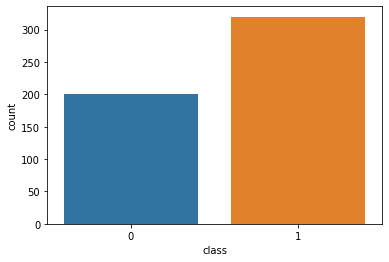

In [378]:
# Percentage of the classes
print("Non diabetes samples make up", round(df["class"].value_counts()[0] / len(df) * 100, 2), "% of the dataset.")
print("Diabetes samples make up", round(df["class"].value_counts()[1] / len(df) * 100, 2), "% of the dataset.")
# Plotting results
sns.countplot(x="class", data=df)

## Data Preprocessing

### CREATING OD (original dataset)

In [379]:
# Encoding 'gender' feature with LabelEncoder
enc = LabelEncoder()
df["gender"] = enc.fit_transform(df["gender"].astype(str))

df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### CREATING ND (normalized dataset)

In [380]:
# Creating the normalized dataset with MinMaxScaler algorithm
scaler = MinMaxScaler()
normalized_df = df.copy()
normalized_df["age"] = scaler.fit_transform(normalized_df["age"].values.reshape(-1, 1))

normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [381]:
normalized_non_diabetes = normalized_df[normalized_df["class"] == 0]
normalized_diabetes = normalized_df[normalized_df["class"] == 1]

# Shape of our normalized dataframe elements.
data = {"Class": ["Non-Diabetes", "Diabetes"], "Shape": [normalized_non_diabetes.shape, normalized_diabetes.shape]}
info_df = pd.DataFrame(data)
info_df

,Class,Shape
0,Non-Diabetes,"(200, 17)"
1,Diabetes,"(320, 17)"


### CREATING COD (clustered original dataset)

In [382]:
# Clustering part
from sklearn.cluster import KMeans

clustered_df = df.copy()
X_clustered = clustered_df.drop("class", axis=1)
y_clustered = clustered_df["class"]

# Clustering with KMeans algorithm according to desired cluster number
clustered_df["class"] = KMeans(n_clusters=clustered_df["class"].nunique(dropna=True), random_state=0).fit_predict(
    X_clustered)
clustered_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


### CREATING CND (clustered and normalized dataset)


In [383]:
clustered_normalized_df = normalized_df.copy()
X_clustered_normalized = clustered_normalized_df.drop("class", axis=1)
y_clustered_normalized = clustered_normalized_df["class"]

clustered_normalized_df["class"] = KMeans(n_clusters=2, random_state=0).fit_predict(X_clustered_normalized)
clustered_normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Dimension Reduction

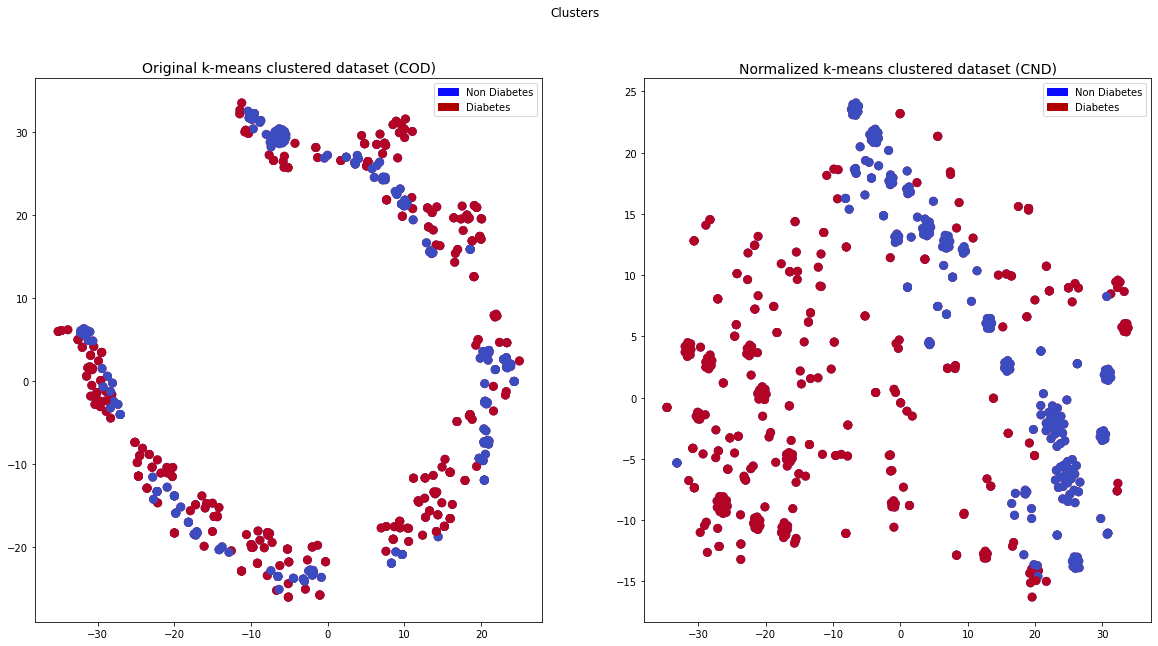

In [384]:
# Dimension-Reduction algorithm t-SNE for visualizing clusters

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

reduced_X_tSNE = TSNE(n_components=2, random_state=0).fit_transform(X_clustered.values)
reduced_X_tSNE_normalized = TSNE(n_components=2, random_state=0).fit_transform(X_clustered_normalized.values)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
f.suptitle("Clusters")

#t-SNE scatter plot
ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y_clustered == 0), cmap="coolwarm", label="Non Diabetes",
            linewidths=3)
ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y_clustered == 1), cmap="coolwarm", label="Diabetes",
            linewidths=3)
ax1.set_title("Original k-means clustered dataset (COD)", fontsize=14)
ax1.grid(False)

ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_clustered == 0), cmap="coolwarm",
            label="Non Diabetes",
            linewidths=3)
ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_clustered == 1), cmap="coolwarm",
            label="Diabetes",
            linewidths=3)
ax2.set_title("Normalized k-means clustered dataset (CND)", fontsize=14)
ax2.grid(False)

blue_legend = mpatches.Patch(color="#0A0AFF", label="Non Diabetes")
red_legend = mpatches.Patch(color="#AF0000", label="Diabetes")
ax1.legend(handles=[blue_legend, red_legend])
ax2.legend(handles=[blue_legend, red_legend])

In [385]:
# Data Partitioning-Splitting
from sklearn.model_selection import train_test_split

# OD
x_train_df, x_test_df, Y_train_df, Y_test_df = train_test_split(df.loc[:, df.columns != 'class'], df.loc[:, ['class']],
                                                                test_size=0.2, random_state=1)
# COD
x_train_clustered_df, x_test_clustered_df, Y_train_clustered_df, Y_test_clustered_df = train_test_split(
    clustered_df.loc[:, clustered_df.columns != 'class'], clustered_df.loc[:, ['class']], test_size=0.2, random_state=1)

# ND
x_train_normalized_df, x_test_normalized_df, Y_train_normalized_df, Y_test_normalized_df = train_test_split(
    normalized_df.loc[:, normalized_df.columns != 'class'], normalized_df.loc[:, ['class']], test_size=0.2,
    random_state=1)

# CND
x_train_clustered_normalized_df, x_test_clustered_normalized_df, Y_train_clustered_normalized_df, Y_test_clustered_normalized_df = train_test_split(
    clustered_normalized_df.loc[:, clustered_normalized_df.columns != 'class'],
    clustered_normalized_df.loc[:, ['class']], test_size=0.2, random_state=1)

## Model Training-Optimizing and Evaluation


In [386]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbour algorithm for classifying task
knn = KNeighborsClassifier()
normalized_knn = KNeighborsClassifier()
clustered_knn = KNeighborsClassifier()
clustered_normalized_knn = KNeighborsClassifier()

# Using GridSearchCV algorithm for optimizing our classifier objects
from sklearn.model_selection import GridSearchCV

# Defining parameter range
k_range = list(range(1, 31, 2))
param_grid = dict(n_neighbors=k_range)

# Finding optimized estimators
grid_df = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_normalized_df = GridSearchCV(normalized_knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,
                                  verbose=1)
grid_clustered_df = GridSearchCV(clustered_knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,
                                 verbose=1)
grid_clustered_normalized_df = GridSearchCV(clustered_normalized_knn, param_grid, cv=10, scoring='accuracy',
                                            return_train_score=False, verbose=1)

In [387]:
from sklearn.metrics import accuracy_score, confusion_matrix


def optimized_prediction(grid_Df, x_train, y_train, x_test, y_test, isNormalized, isClustered, message):
    grid_search = grid_Df.fit(x_train, np.array(y_train).ravel())

    print("Best k value for KNN: " + str(grid_search.best_params_))

    accuracy = grid_search.best_score_ * 100
    if isNormalized:
        if isClustered:
            print("Accuracy for our clustered normalized training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our normalized training dataset with tuning is : {:.2f}%".format(accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our original training dataset with tuning is : {:.2f}%".format(accuracy))

    knn = grid_search.best_estimator_

    knn.fit(x_train, np.array(y_train).ravel())

    y_test_hat = knn.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_test_hat) * 100

    if isNormalized:
        if isClustered:
            print(
                "Accuracy for our clustered normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our original testing dataset with tuning is : {:.2f}%".format(test_accuracy))

    display_confusion_matrix(confusion_matrix(y_test, y_test_hat), message=message)

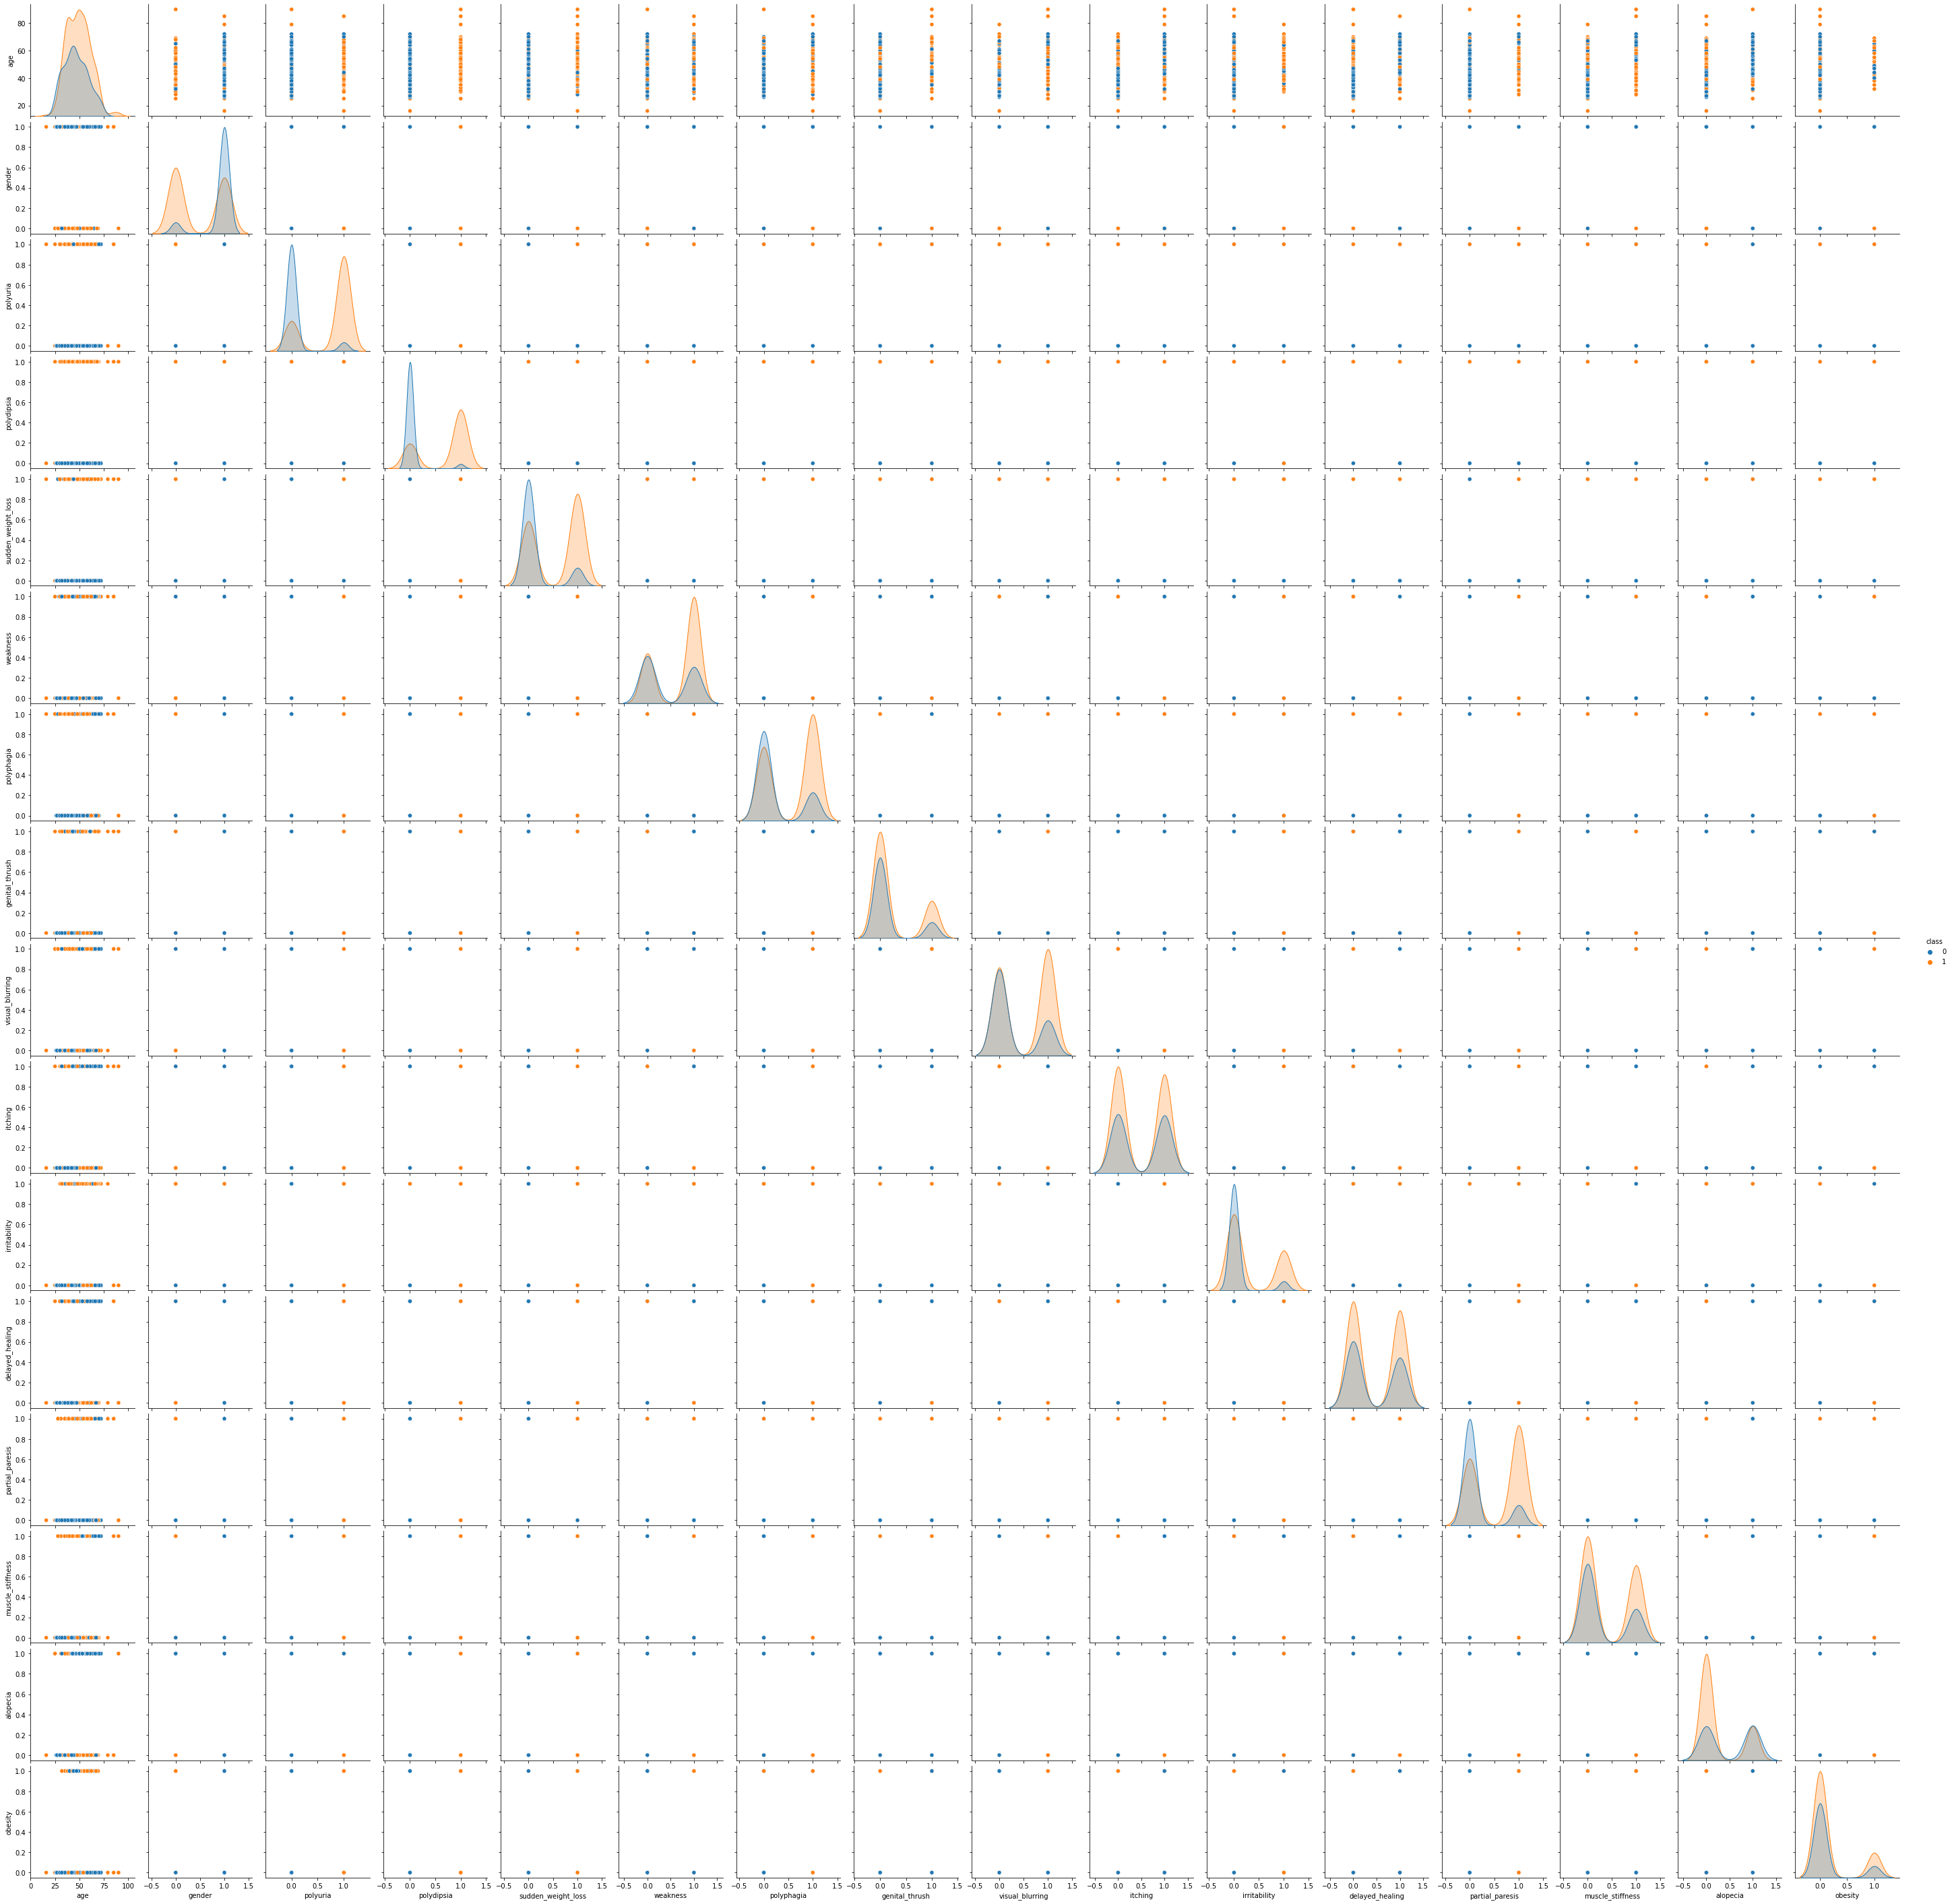

In [388]:
sns.pairplot(df, kind="scatter", hue="class")

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best k value for KNN: {'n_neighbors': 1}
Accuracy for our original training dataset with tuning is : 93.26%
Accuracy for our original testing dataset with tuning is : 91.35%


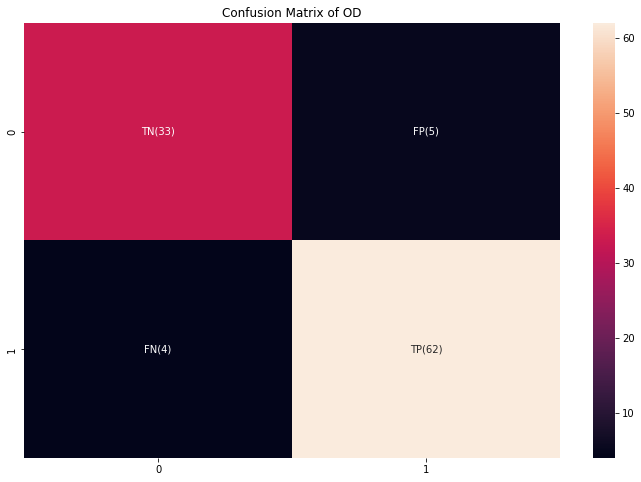

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best k value for KNN: {'n_neighbors': 1}
Accuracy for our normalized training dataset with tuning is : 97.12%
Accuracy for our normalized testing dataset with tuning is : 95.19%


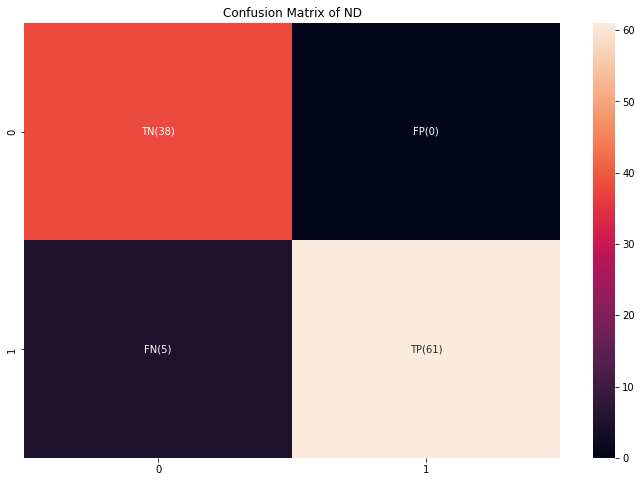

In [389]:
# PREDICTION WITH ORIGINAL DATASET STEP

# Prediction for OD
optimized_prediction(grid_df, x_train_df, Y_train_df, x_test_df, Y_test_df, isNormalized=False, isClustered=False,
                     message="OD")
# Prediction for ND
optimized_prediction(grid_normalized_df, x_train_normalized_df, Y_train_normalized_df, x_test_normalized_df,
                     Y_test_normalized_df, isNormalized=True, isClustered=False, message="ND")

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best k value for KNN: {'n_neighbors': 1}
Accuracy for our clustered original training dataset with tuning is : 100.00%
Accuracy for our clustered original testing dataset with tuning is : 99.04%


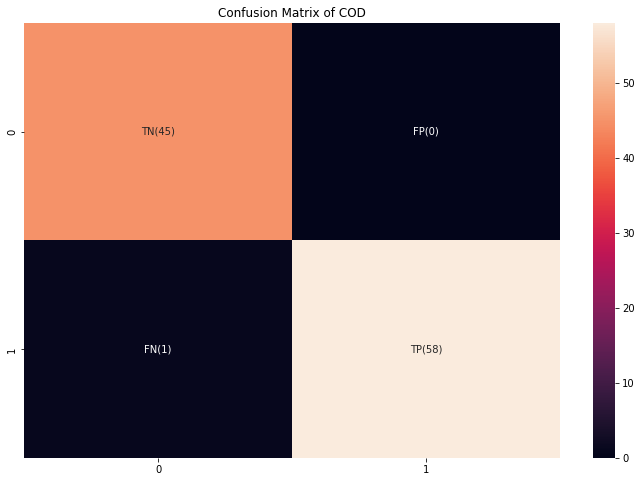

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best k value for KNN: {'n_neighbors': 5}
Accuracy for our clustered normalized training dataset with tuning is : 96.88%
Accuracy for our clustered normalized testing dataset with tuning is : 94.23%


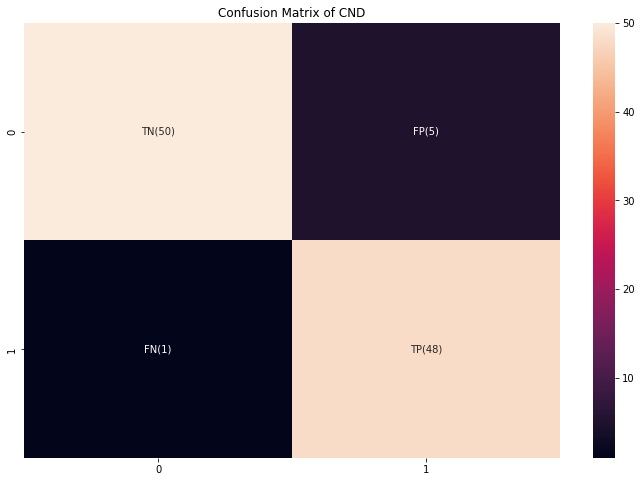

In [390]:
# PREDICTION WITH CLUSTERED DATASET STEP

# Prediction for COD
optimized_prediction(grid_clustered_df, x_train_clustered_df, Y_train_clustered_df, x_test_clustered_df,
                     Y_test_clustered_df, isNormalized=False, isClustered=True, message="COD")
# Prediction for CND
optimized_prediction(grid_clustered_normalized_df, x_train_clustered_normalized_df, Y_train_clustered_normalized_df,
                     x_test_clustered_normalized_df, Y_test_clustered_normalized_df, isNormalized=True,
                     isClustered=True, message="CND")